In [2]:
import matplotlib.pyplot as plt
import holoviews as hv
import hvplot
import hvplot.pandas
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import json
import time
from config import api_key
from scipy.stats import linregress
from pprint import pprint

In [4]:
artist = 'FooFighters'
#artist = 'FooFighters,DepecheMode,GreenDay,TimMcGraw'
dmaId = '264,324,385,336'
segment = 'Music'

events = requests.get(f'https://app.ticketmaster.com/discovery/v2/events.json?keyword={artist}&dmaId={dmaId}&segment={segment}&apikey={api_key}').json()

In [9]:
#open('test_output.json', 'w').write(json.dumps(events, indent=4))

In [5]:
# Create empty lists for each column
artist = []
date = []
city = []
state = []
country_list = []
min_price = []
max_price = []
latitude = []
longitude = []

for x in events['_embedded']['events']:
    
    artist_name = x['name']
    event_date = x['dates']['start']['localDate']
    event_city = x['_embedded']['venues'][0]['city']['name']
    country = x['_embedded']['venues'][0]['country']['countryCode']
    lat = x['_embedded']['venues'][0]['location']['latitude']
    long = x['_embedded']['venues'][0]['location']['longitude']

    artist.append(artist_name)
    date.append(event_date)
    city.append(event_city)
    country_list.append(country)
    
    if 'state' in x['_embedded']['venues'][0]:
        state.append(x['_embedded']['venues'][0]['state']['stateCode'])
    else:
        state.append(None)

    latitude.append(lat)
    longitude.append(long)

    if 'priceRanges' in x:
        min_price.append(x['priceRanges'][0]['min'])
        max_price.append(x['priceRanges'][0]['max'])
    else:
        min_price.append(None)
        max_price.append(None)

# Create the DataFrame using the lists
ff_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'Date': date,
    'City': city,
    'State': state,
    'Country': country_list,
    'Min Price': min_price,
    'Max Price': max_price,
    'Lat': latitude,
    'Lon': longitude
})

# Display the DataFrame
ff_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
0,Foo Fighters - Everything Or Nothing At All,2024-08-03,Denver,CO,US,36.0,175.5,39.743853,-105.020127
1,Foo Fighters - Everything Or Nothing At All,2024-08-18,Seattle,WA,US,39.5,179.5,47.590333,-122.33285
2,Foo Fighters - Everything Or Nothing At All,2024-07-28,Minneapolis,MN,US,39.5,179.5,44.981422,-93.27847
3,Foo Fighters - Everything Or Nothing At All,2024-08-09,Los Angeles,CA,US,59.5,179.5,34.012879,-118.284926
4,Foo Fighters - Everything Or Nothing At All,2024-08-11,Los Angeles,CA,US,59.5,179.5,34.012879,-118.284926


In [6]:
ff_events_df = ff_events_df.loc[ff_events_df["Country"] == "US"]

In [7]:
ff_events_df = ff_events_df.astype({
    "Artist & Tour": str,
    "Date": str,
    "City": str,
    "State": str,
    "Country": str,
    "Min Price": float,
    "Max Price": float,
    "Lat": float,
    "Lon": float
})

In [8]:
ff_events_df = ff_events_df.sort_values("Date")
ff_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
2,Foo Fighters - Everything Or Nothing At All,2024-07-28,Minneapolis,MN,US,39.5,179.5,44.981422,-93.278470
0,Foo Fighters - Everything Or Nothing At All,2024-08-03,Denver,CO,US,36.0,175.5,39.743853,-105.020127
3,Foo Fighters - Everything Or Nothing At All,2024-08-09,Los Angeles,CA,US,59.5,179.5,34.012879,-118.284926
4,Foo Fighters - Everything Or Nothing At All,2024-08-11,Los Angeles,CA,US,59.5,179.5,34.012879,-118.284926
1,Foo Fighters - Everything Or Nothing At All,2024-08-18,Seattle,WA,US,39.5,179.5,47.590333,-122.332850


In [9]:
ff_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2 to 1
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Artist & Tour  5 non-null      object 
 1   Date           5 non-null      object 
 2   City           5 non-null      object 
 3   State          5 non-null      object 
 4   Country        5 non-null      object 
 5   Min Price      5 non-null      float64
 6   Max Price      5 non-null      float64
 7   Lat            5 non-null      float64
 8   Lon            5 non-null      float64
dtypes: float64(4), object(5)
memory usage: 400.0+ bytes


In [10]:
# Configure the map plot
map_plot = ff_events_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    color = "City",
    frame_width = 800,
    frame_height = 600
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City)

In [12]:
artist = 'DepecheMode'
#artist = 'FooFighters,DepecheMode,GreenDay,TimMcGraw'
dmaId = '264,324,385,336'
segment = 'Music'

events = requests.get(f'https://app.ticketmaster.com/discovery/v2/events.json?keyword={artist}&dmaId={dmaId}&segment={segment}&apikey={api_key}').json()

In [13]:
# Create empty lists for each column
artist = []
date = []
city = []
state = []
country_list = []
min_price = []
max_price = []
latitude = []
longitude = []

for x in events['_embedded']['events']:
    
    artist_name = x['name']
    event_date = x['dates']['start']['localDate']
    event_city = x['_embedded']['venues'][0]['city']['name']
    country = x['_embedded']['venues'][0]['country']['countryCode']
    lat = x['_embedded']['venues'][0]['location']['latitude']
    long = x['_embedded']['venues'][0]['location']['longitude']

    artist.append(artist_name)
    date.append(event_date)
    city.append(event_city)
    country_list.append(country)
    
    if 'state' in x['_embedded']['venues'][0]:
        state.append(x['_embedded']['venues'][0]['state']['stateCode'])
    else:
        state.append(None)

    latitude.append(lat)
    longitude.append(long)

    if 'priceRanges' in x:
        min_price.append(x['priceRanges'][0]['min'])
        max_price.append(x['priceRanges'][0]['max'])
    else:
        min_price.append(None)
        max_price.append(None)

# Create the DataFrame using the lists
dm_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'Date': date,
    'City': city,
    'State': state,
    'Country': country_list,
    'Min Price': min_price,
    'Max Price': max_price,
    'Lat': latitude,
    'Lon': longitude
})

# Display the DataFrame
dm_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
0,Depeche Mode: Memento Mori Tour,2023-12-15,Los Angeles,CA,US,70.0,370.0,34.043003,-118.267253
1,Depeche Mode: Memento Mori Tour,2023-12-10,Inglewood,CA,US,49.5,259.5,33.9583,-118.341868
2,Depeche Mode: Memento Mori Tour,2023-11-26,Seattle,WA,US,69.0,274.0,47.6221261,-122.35401604
3,Depeche Mode: Memento Mori Tour,2023-12-17,Los Angeles,CA,US,55.0,180.0,34.043003,-118.267253
4,Depeche Mode: Memento Mori Tour,2023-12-12,Inglewood,CA,US,44.5,249.5,33.9583,-118.341868


In [14]:
dm_events_df = dm_events_df.loc[dm_events_df["Country"] == "US"]

In [15]:
dm_events_df = dm_events_df.sort_values("Date")
dm_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
2,Depeche Mode: Memento Mori Tour,2023-11-26,Seattle,WA,US,69.0,274.0,47.6221261,-122.35401604
1,Depeche Mode: Memento Mori Tour,2023-12-10,Inglewood,CA,US,49.5,259.5,33.9583,-118.341868
4,Depeche Mode: Memento Mori Tour,2023-12-12,Inglewood,CA,US,44.5,249.5,33.9583,-118.341868
0,Depeche Mode: Memento Mori Tour,2023-12-15,Los Angeles,CA,US,70.0,370.0,34.043003,-118.267253
3,Depeche Mode: Memento Mori Tour,2023-12-17,Los Angeles,CA,US,55.0,180.0,34.043003,-118.267253


In [16]:
artist = 'GreenDay'
#artist = 'FooFighters,DepecheMode,GreenDay,TimMcGraw'
dmaId = '264,324,385,336'
segment = 'Music'

events = requests.get(f'https://app.ticketmaster.com/discovery/v2/events.json?keyword={artist}&dmaId={dmaId}&segment={segment}&apikey={api_key}').json()

In [17]:
# Create empty lists for each column
artist = []
date = []
city = []
state = []
country_list = []
min_price = []
max_price = []
latitude = []
longitude = []

for x in events['_embedded']['events']:
    
    artist_name = x['name']
    event_date = x['dates']['start']['localDate']
    event_city = x['_embedded']['venues'][0]['city']['name']
    country = x['_embedded']['venues'][0]['country']['countryCode']
    lat = x['_embedded']['venues'][0]['location']['latitude']
    long = x['_embedded']['venues'][0]['location']['longitude']

    artist.append(artist_name)
    date.append(event_date)
    city.append(event_city)
    country_list.append(country)
    
    if 'state' in x['_embedded']['venues'][0]:
        state.append(x['_embedded']['venues'][0]['state']['stateCode'])
    else:
        state.append(None)

    latitude.append(lat)
    longitude.append(long)

    if 'priceRanges' in x:
        min_price.append(x['priceRanges'][0]['min'])
        max_price.append(x['priceRanges'][0]['max'])
    else:
        min_price.append(None)
        max_price.append(None)

# Create the DataFrame using the lists
gd_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'Date': date,
    'City': city,
    'State': state,
    'Country': country_list,
    'Min Price': min_price,
    'Max Price': max_price,
    'Lat': latitude,
    'Lon': longitude
})

# Display the DataFrame
gd_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
0,Green Day - The Saviors Tour,2024-09-14,Inglewood,CA,US,35.5,249.0,33.950529,-118.343767
1,Green Day - The Saviors Tour,2024-08-17,Minneapolis,MN,US,28.5,943.0,44.981422,-93.27847
2,Green Day - The Saviors Tour,2024-09-07,Denver,CO,US,35.0,199.0,39.7564355,-104.9942814
3,Green Day - The Saviors Tour,2024-09-23,Seattle,WA,US,39.5,199.0,47.590333,-122.33285


In [18]:
gd_events_df = gd_events_df.loc[gd_events_df["Country"] == "US"]

In [19]:
gd_events_df = gd_events_df.sort_values("Date")
gd_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
1,Green Day - The Saviors Tour,2024-08-17,Minneapolis,MN,US,28.5,943.0,44.981422,-93.27847
2,Green Day - The Saviors Tour,2024-09-07,Denver,CO,US,35.0,199.0,39.7564355,-104.9942814
0,Green Day - The Saviors Tour,2024-09-14,Inglewood,CA,US,35.5,249.0,33.950529,-118.343767
3,Green Day - The Saviors Tour,2024-09-23,Seattle,WA,US,39.5,199.0,47.590333,-122.33285


In [20]:
artist = 'TimMcGraw'
#artist = 'FooFighters,DepecheMode,GreenDay,TimMcGraw'
dmaId = '264,324,385,336'
segment = 'Music'

events = requests.get(f'https://app.ticketmaster.com/discovery/v2/events.json?keyword={artist}&dmaId={dmaId}&segment={segment}&apikey={api_key}').json()

In [21]:
# Create empty lists for each column
artist = []
date = []
city = []
state = []
country_list = []
min_price = []
max_price = []
latitude = []
longitude = []

for x in events['_embedded']['events']:
    
    artist_name = x['name']
    event_date = x['dates']['start']['localDate']
    event_city = x['_embedded']['venues'][0]['city']['name']
    country = x['_embedded']['venues'][0]['country']['countryCode']
    lat = x['_embedded']['venues'][0]['location']['latitude']
    long = x['_embedded']['venues'][0]['location']['longitude']

    artist.append(artist_name)
    date.append(event_date)
    city.append(event_city)
    country_list.append(country)
    
    if 'state' in x['_embedded']['venues'][0]:
        state.append(x['_embedded']['venues'][0]['state']['stateCode'])
    else:
        state.append(None)

    latitude.append(lat)
    longitude.append(long)

    if 'priceRanges' in x:
        min_price.append(x['priceRanges'][0]['min'])
        max_price.append(x['priceRanges'][0]['max'])
    else:
        min_price.append(None)
        max_price.append(None)



In [22]:
# Create the DataFrame using the lists
tm_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'Date': date,
    'City': city,
    'State': state,
    'Country': country_list,
    'Min Price': min_price,
    'Max Price': max_price,
    'Lat': latitude,
    'Lon': longitude
})

# Display the DataFrame
tm_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
0,Tim McGraw: Standing Room Only Tour 2024,2024-04-20,Saint Paul,MN,US,34.50,1034.50,44.94489438,-93.10121819
1,Tim McGraw: Standing Room Only Tour 2024,2024-03-29,Seattle,WA,US,39.50,219.50,47.6221261,-122.35401604
2,Tim McGraw: Standing Room Only Tour 2024,2024-04-04,Denver,CO,US,39.50,219.50,39.74724,-105.010166
3,Tim McGraw: Standing Room Only Tour 2024,2024-06-28,Inglewood,CA,US,39.75,219.75,33.9583,-118.341868
4,Club Level Seating: Tim McGraw,2024-04-04,Denver,CO,US,149.50,149.50,39.74724,-105.010166
5,Carly Pearce - Pre-Show Performance Upgrade,2024-03-29,Seattle,WA,US,NaN,NaN,47.6221261,-122.35401604
6,Carly Pearce - Pre-Show Performance Upgrade,2024-04-04,Denver,CO,US,NaN,NaN,39.74724,-105.010166
7,Carly Pearce - Pre-Show Performance Upgrade,2024-04-20,Saint Paul,MN,US,NaN,NaN,44.94489438,-93.10121819
8,Carly Pearce - Pre-Show Performance Upgrade,2024-06-28,Inglewood,CA,US,NaN,NaN,33.9583,-118.341868


In [23]:
tm_events_df = tm_events_df.loc[tm_events_df["Country"] == "US"]
tm_events_df = tm_events_df.loc[tm_events_df["Artist & Tour"] == "Tim McGraw: Standing Room Only Tour 2024"]

In [24]:
tm_events_df = tm_events_df.sort_values("Date")
tm_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
1,Tim McGraw: Standing Room Only Tour 2024,2024-03-29,Seattle,WA,US,39.50,219.50,47.6221261,-122.35401604
2,Tim McGraw: Standing Room Only Tour 2024,2024-04-04,Denver,CO,US,39.50,219.50,39.74724,-105.010166
0,Tim McGraw: Standing Room Only Tour 2024,2024-04-20,Saint Paul,MN,US,34.50,1034.50,44.94489438,-93.10121819
3,Tim McGraw: Standing Room Only Tour 2024,2024-06-28,Inglewood,CA,US,39.75,219.75,33.9583,-118.341868


In [25]:
# Drop any rows with null values
tm_clean = tm_events_df.dropna()

# Display sample data
tm_clean

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
1,Tim McGraw: Standing Room Only Tour 2024,2024-03-29,Seattle,WA,US,39.50,219.50,47.6221261,-122.35401604
2,Tim McGraw: Standing Room Only Tour 2024,2024-04-04,Denver,CO,US,39.50,219.50,39.74724,-105.010166
0,Tim McGraw: Standing Room Only Tour 2024,2024-04-20,Saint Paul,MN,US,34.50,1034.50,44.94489438,-93.10121819
3,Tim McGraw: Standing Room Only Tour 2024,2024-06-28,Inglewood,CA,US,39.75,219.75,33.9583,-118.341868


In [26]:
market_events_df = pd.concat([ff_events_df,dm_events_df,gd_events_df,tm_events_df])
market_events_df 

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
2,Foo Fighters - Everything Or Nothing At All,2024-07-28,Minneapolis,MN,US,39.50,179.50,44.981422,-93.27847
0,Foo Fighters - Everything Or Nothing At All,2024-08-03,Denver,CO,US,36.00,175.50,39.743853,-105.020127
3,Foo Fighters - Everything Or Nothing At All,2024-08-09,Los Angeles,CA,US,59.50,179.50,34.012879,-118.284926
4,Foo Fighters - Everything Or Nothing At All,2024-08-11,Los Angeles,CA,US,59.50,179.50,34.012879,-118.284926
1,Foo Fighters - Everything Or Nothing At All,2024-08-18,Seattle,WA,US,39.50,179.50,47.590333,-122.33285
2,Depeche Mode: Memento Mori Tour,2023-11-26,Seattle,WA,US,69.00,274.00,47.6221261,-122.35401604
1,Depeche Mode: Memento Mori Tour,2023-12-10,Inglewood,CA,US,49.50,259.50,33.9583,-118.341868
4,Depeche Mode: Memento Mori Tour,2023-12-12,Inglewood,CA,US,44.50,249.50,33.9583,-118.341868
0,Depeche Mode: Memento Mori Tour,2023-12-15,Los Angeles,CA,US,70.00,370.00,34.043003,-118.267253
3,Depeche Mode: Memento Mori Tour,2023-12-17,Los Angeles,CA,US,55.00,180.00,34.043003,-118.267253


In [36]:
market_events_df.to_csv('market_event_output', index=False)

In [55]:
market_events_artist_df = pd.read_csv("market_event_artist_output.csv")
market_events_artist_df

,Artist,Date,City,State,Country,Min Price,Max Price
0,Foo Fighters,2024-07-28,Minneapolis,MN,US,39.50,179.50
1,Foo Fighters,2024-08-03,Denver,CO,US,36.00,175.50
2,Foo Fighters,2024-08-09,Los Angeles,CA,US,59.50,179.50
3,Foo Fighters,2024-08-11,Los Angeles,CA,US,59.50,179.50
4,Foo Fighters,2024-08-18,Seattle,WA,US,39.50,179.50
5,Depeche Mode,2023-11-16,Denver,CO,US,49.50,179.50
6,Depeche Mode,2023-11-26,Seattle,WA,US,69.00,274.00
7,Depeche Mode,2023-12-10,Inglewood,CA,US,49.50,259.50
8,Depeche Mode,2023-12-12,Inglewood,CA,US,44.50,249.50
9,Depeche Mode,2023-12-15,Los Angeles,CA,US,70.00,370.00


In [56]:
MNSTP_events_df = market_events_artist_df.loc[market_events_artist_df["State"]=="MN"]
MNSTP_events_df.set_index(["Artist"],inplace=True)
MNSTP_events_df

,Date,City,State,Country,Min Price,Max Price
Artist,,,,,,
Foo Fighters,2024-07-28,Minneapolis,MN,US,39.5,179.5
Green Day,2024-08-17,Minneapolis,MN,US,28.5,943.0
Tim McGraw,2024-04-20,Saint Paul,MN,US,34.5,1034.5


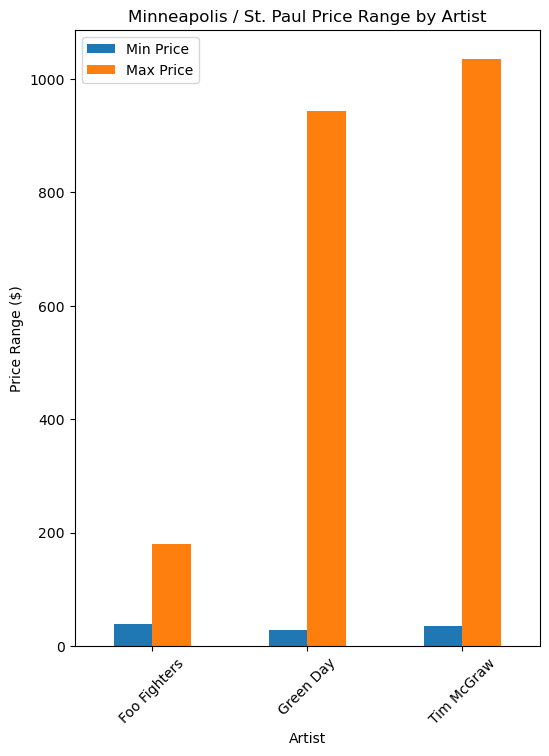

<Figure size 640x480 with 0 Axes>

In [57]:
# Create a bar chart 
bar_MNSTP_chart = MNSTP_events_df.plot(kind='bar', figsize=(6,8))

# Add labels
plt.xlabel('Artist')
plt.ylabel('Price Range ($)')
plt.title('Minneapolis / St. Paul Price Range by Artist')

plt.xticks(rotation=45)

plt.savefig("output_data/FigMNSTP.png")

plt.show()
plt.tight_layout()

In [58]:
market_events_artist_df = pd.read_csv("market_event_artist_output.csv")
market_events_artist_df

,Artist,Date,City,State,Country,Min Price,Max Price
0,Foo Fighters,2024-07-28,Minneapolis,MN,US,39.50,179.50
1,Foo Fighters,2024-08-03,Denver,CO,US,36.00,175.50
2,Foo Fighters,2024-08-09,Los Angeles,CA,US,59.50,179.50
3,Foo Fighters,2024-08-11,Los Angeles,CA,US,59.50,179.50
4,Foo Fighters,2024-08-18,Seattle,WA,US,39.50,179.50
5,Depeche Mode,2023-11-16,Denver,CO,US,49.50,179.50
6,Depeche Mode,2023-11-26,Seattle,WA,US,69.00,274.00
7,Depeche Mode,2023-12-10,Inglewood,CA,US,49.50,259.50
8,Depeche Mode,2023-12-12,Inglewood,CA,US,44.50,249.50
9,Depeche Mode,2023-12-15,Los Angeles,CA,US,70.00,370.00


In [59]:
Denver_events_df = market_events_artist_df.loc[market_events_artist_df["State"]=="CO"]
Denver_events_df.set_index(["Artist"],inplace=True)
Denver_events_df

,Date,City,State,Country,Min Price,Max Price
Artist,,,,,,
Foo Fighters,2024-08-03,Denver,CO,US,36.0,175.5
Depeche Mode,2023-11-16,Denver,CO,US,49.5,179.5
Green Day,2024-09-07,Denver,CO,US,35.0,199.0
Tim McGraw,2024-04-04,Denver,CO,US,39.5,219.5


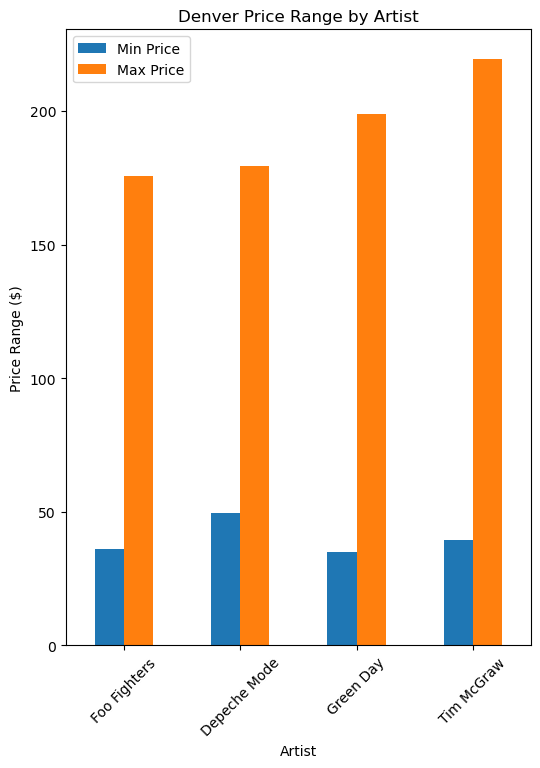

<Figure size 640x480 with 0 Axes>

In [61]:
# Create a bar chart 
Denver_chart = Denver_events_df.plot(kind='bar', figsize=(6,8))

# Add labels
plt.xlabel('Artist')
plt.ylabel('Price Range ($)')
plt.title('Denver Price Range by Artist')

plt.xticks(rotation=45)

plt.savefig("output_data/FigDenver.png")

plt.show()
plt.tight_layout()

In [62]:
market_events_artist_df = pd.read_csv("market_event_artist_output.csv")
market_events_artist_df

,Artist,Date,City,State,Country,Min Price,Max Price
0,Foo Fighters,2024-07-28,Minneapolis,MN,US,39.50,179.50
1,Foo Fighters,2024-08-03,Denver,CO,US,36.00,175.50
2,Foo Fighters,2024-08-09,Los Angeles,CA,US,59.50,179.50
3,Foo Fighters,2024-08-11,Los Angeles,CA,US,59.50,179.50
4,Foo Fighters,2024-08-18,Seattle,WA,US,39.50,179.50
5,Depeche Mode,2023-11-16,Denver,CO,US,49.50,179.50
6,Depeche Mode,2023-11-26,Seattle,WA,US,69.00,274.00
7,Depeche Mode,2023-12-10,Inglewood,CA,US,49.50,259.50
8,Depeche Mode,2023-12-12,Inglewood,CA,US,44.50,249.50
9,Depeche Mode,2023-12-15,Los Angeles,CA,US,70.00,370.00


In [63]:
Seattle_events_df = market_events_artist_df.loc[market_events_artist_df["State"]=="WA"]
Seattle_events_df.set_index(["Artist"],inplace=True)
Seattle_events_df

,Date,City,State,Country,Min Price,Max Price
Artist,,,,,,
Foo Fighters,2024-08-18,Seattle,WA,US,39.5,179.5
Depeche Mode,2023-11-26,Seattle,WA,US,69.0,274.0
Green Day,2024-09-23,Seattle,WA,US,39.5,199.0
Tim McGraw,2024-03-29,Seattle,WA,US,39.5,219.5


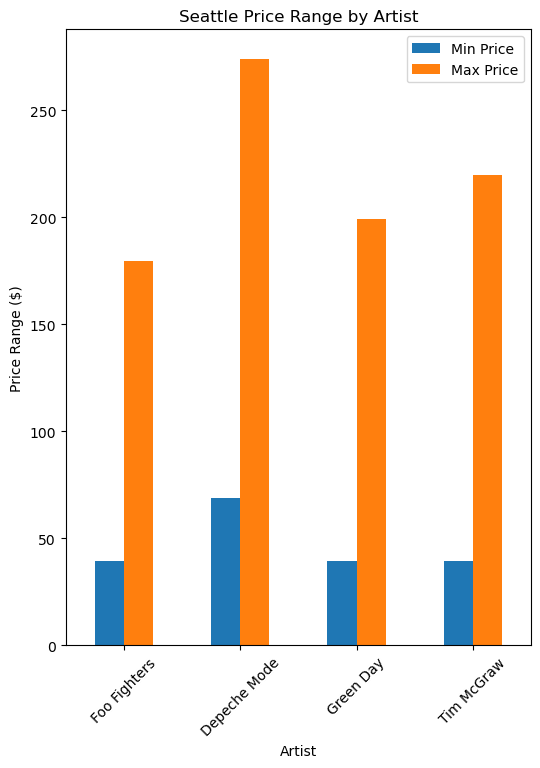

<Figure size 640x480 with 0 Axes>

In [64]:
# Create a bar chart 
Seattle_chart = Seattle_events_df.plot(kind='bar', figsize=(6,8))


# Add labels
plt.xlabel('Artist')
plt.ylabel('Price Range ($)')
plt.title('Seattle Price Range by Artist')

plt.xticks(rotation=45)

plt.savefig("output_data/FigSeattle.png")

plt.show()
plt.tight_layout()

In [65]:
market_events_artist_df = pd.read_csv("market_event_artist_output.csv")
market_events_artist_df

,Artist,Date,City,State,Country,Min Price,Max Price
0,Foo Fighters,2024-07-28,Minneapolis,MN,US,39.50,179.50
1,Foo Fighters,2024-08-03,Denver,CO,US,36.00,175.50
2,Foo Fighters,2024-08-09,Los Angeles,CA,US,59.50,179.50
3,Foo Fighters,2024-08-11,Los Angeles,CA,US,59.50,179.50
4,Foo Fighters,2024-08-18,Seattle,WA,US,39.50,179.50
5,Depeche Mode,2023-11-16,Denver,CO,US,49.50,179.50
6,Depeche Mode,2023-11-26,Seattle,WA,US,69.00,274.00
7,Depeche Mode,2023-12-10,Inglewood,CA,US,49.50,259.50
8,Depeche Mode,2023-12-12,Inglewood,CA,US,44.50,249.50
9,Depeche Mode,2023-12-15,Los Angeles,CA,US,70.00,370.00


In [66]:
LA_events_df = market_events_artist_df.loc[market_events_artist_df["State"]=="CA"]
LA_events_df.set_index(["Artist"],inplace=True)
LA_events_df

,Date,City,State,Country,Min Price,Max Price
Artist,,,,,,
Foo Fighters,2024-08-09,Los Angeles,CA,US,59.50,179.50
Foo Fighters,2024-08-11,Los Angeles,CA,US,59.50,179.50
Depeche Mode,2023-12-10,Inglewood,CA,US,49.50,259.50
Depeche Mode,2023-12-12,Inglewood,CA,US,44.50,249.50
Depeche Mode,2023-12-15,Los Angeles,CA,US,70.00,370.00
Depeche Mode,2023-12-17,Los Angeles,CA,US,55.00,180.00
Green Day,2024-09-14,Inglewood,CA,US,35.50,249.00
Tim McGraw,2024-06-28,Inglewood,CA,US,39.75,219.75


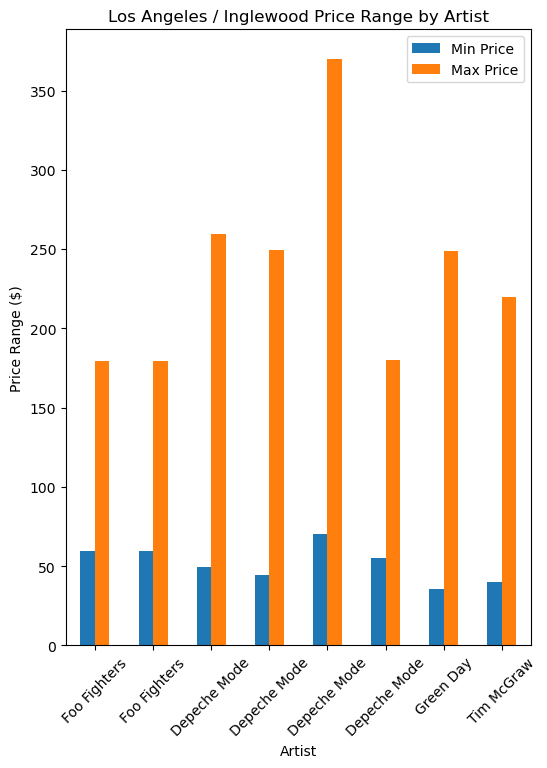

<Figure size 640x480 with 0 Axes>

In [68]:
# Create a bar chart 
LA_chart = LA_events_df.plot(kind='bar', figsize=(6,8))

# Add labels
plt.xlabel('Artist')
plt.ylabel('Price Range ($)')
plt.title('Los Angeles / Inglewood Price Range by Artist')

plt.xticks(rotation=45)

plt.savefig("output_data/FigLA.png")

plt.show()
plt.tight_layout()